In [56]:
from pyamg.gallery.elasticity import linear_elasticity
from plot_utils import *
from mat_utils import PetscAMGMechanics
from petsc4py import PETSc


A, B = linear_elasticity(grid=(100, 100), spacing=(1, 2), E=1e10, nu=0.01, format='csr')

Solve  took: 0.05
True residual decrease: 2.6854966201940443e-09
PETSc Converged Reason: 2


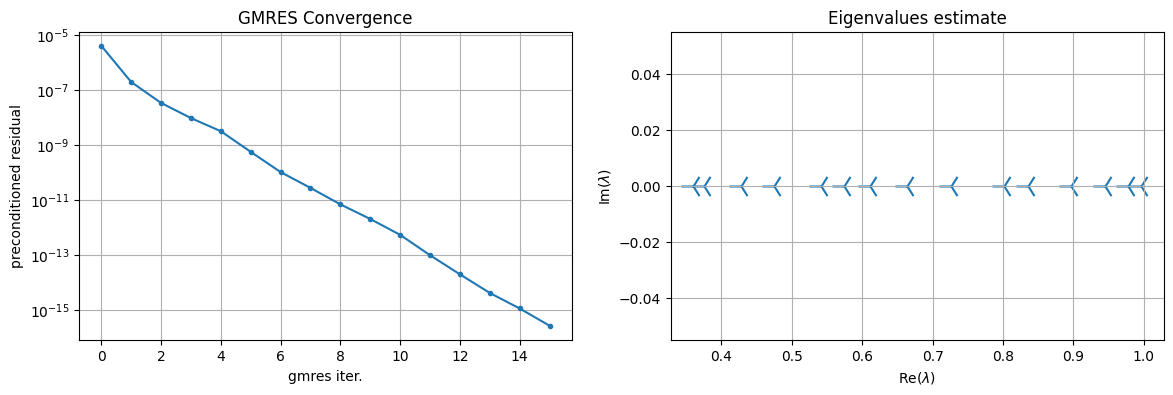

In [57]:
prec = PetscAMGMechanics(dim=2, mat=A)
solve_petsc(A, prec)

Solve  took: 0.06
True residual decrease: 3.744280665035227e-09
PETSc Converged Reason: 2


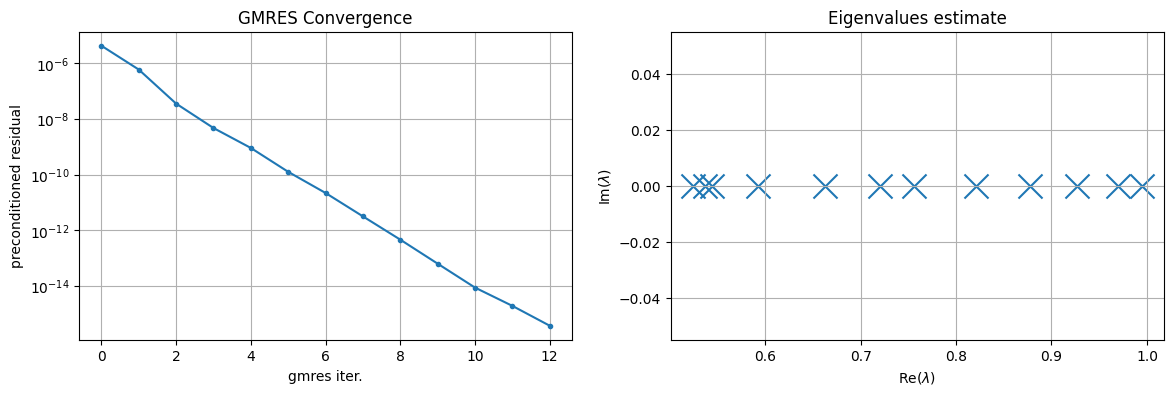

In [60]:
prec = PetscAMGMechanics(dim=2, mat=A, null_space=B.T)
solve_petsc(A, prec)

In [59]:
prec.pc.view()

PC Object: 1 MPI process
  type: gamg
    type is MULTIPLICATIVE, levels=5 cycles=v
      Cycles per PCApply=1
      Using externally compute Galerkin coarse grid matrices
      GAMG specific options
        Threshold for dropping small values in graph on each level =   -1.   -1.   -1.   -1.   -1.  
        Threshold scaling factor for each level not specified = 1.
        AGG specific options
          Number of levels of aggressive coarsening 1
          Square graph aggressive coarsening
          Number smoothing steps 1
        Complexity:    grid = 1.1844    operator = 1.51637
  Coarse grid solver -- level 0 -------------------------------
    KSP Object: (mg_coarse_) 1 MPI process
      type: preonly
      maximum iterations=10000, initial guess is zero
      tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
      left preconditioning
      using NONE norm type for convergence test
    PC Object: (mg_coarse_) 1 MPI process
      type: bjacobi
        number of block